#Full DL Solution

© 2023, Zaka AI, Inc. All Rights Reserved.

---

###**Case Study:** Stroke Prediction

**Objective:** The goal of this project is to walk you through a case study where you can apply the deep learning concepts that you learned about during the week. By the end of this project, you would have developed a solution that predicts if a person will have a stroke or not.


**Dataset Explanation:** We will be using the stroke dataset. Its features are:


* **id:** unique identifier
* **gender:** "Male", "Female" or "Other"
* **age:** age of the patient
* **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married:** "No" or "Yes"
* **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type:** "Rural" or "Urban"
* **avg_glucose_level:** average glucose level in blood
* **bmi:** body mass index
* **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke:** 1 if the patient had a stroke or 0 if not

#Importing Libraries

We start by importing the libraries: numpy and pandas

In [ ]:
#Test Your Zaka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_recall_fscore_support
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, PredefinedSplit
from sklearn.pipeline import Pipeline, make_pipeline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.regularizers import l1, l2
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping, ModelCheckpoint

!python -m pip install scikeras
from scikeras.wrappers import KerasClassifier
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier #depricated

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Loading the Dataset

We load the dataset from a csv file, and see its first rows

In [ ]:
#Test Your Zaka
#clone git repo
!git clone https://github.com/royaad/AIC
# change working directory
%cd AIC/Week_06/data
#specifying the filenames
filename = 'healthcare-dataset-stroke-data.csv'
#reading the files with read_csv
df = pd.read_csv(filename)
df.head()

Cloning into 'AIC'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 45 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (45/45), 97.50 KiB | 2.07 MiB/s, done.
/content/AIC/Week_06/data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Exploratory Data Analysis

Now we start the exploratory data analysis.

###Shape of the data

First, you need to know the shape of our data (How many examples and features do we have)

In [ ]:
#Test Your Zaka
nrows, ncols = df.shape
print(f"We have {nrows} examples and {ncols-1} features")

We have 5110 examples and 11 features


###Types of different Columns

See the type of each of your features and see if you have any nulls

In [ ]:
#Test Your Zaka
df.info()
print ("\nMissing values per column:\n")
print (df.isnull().sum(axis = 0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Missing values per column:

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
eve

**We have 201 values missing in bmi.**

###Dealing with categorical variables

Now we will walk through the categorical variables that we have to see the categories and the counts of each of them.

In [ ]:
#Test Your Zaka
categorical_columns = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
#I am obliged to do it as such since some categorical columns (like hypertension) are already in int64 format.
for col in categorical_columns:
  print(f'The counts in column "{col}" are:\n')
  print(df[col].value_counts(),'\n\n')

The counts in column "gender" are:

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 


The counts in column "hypertension" are:

0    4612
1     498
Name: hypertension, dtype: int64 


The counts in column "heart_disease" are:

0    4834
1     276
Name: heart_disease, dtype: int64 


The counts in column "ever_married" are:

Yes    3353
No     1757
Name: ever_married, dtype: int64 


The counts in column "work_type" are:

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 


The counts in column "Residence_type" are:

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 


The counts in column "smoking_status" are:

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 


The counts in column "stroke" are:

0    4861
1     249
Name: stroke, dtype: int64 




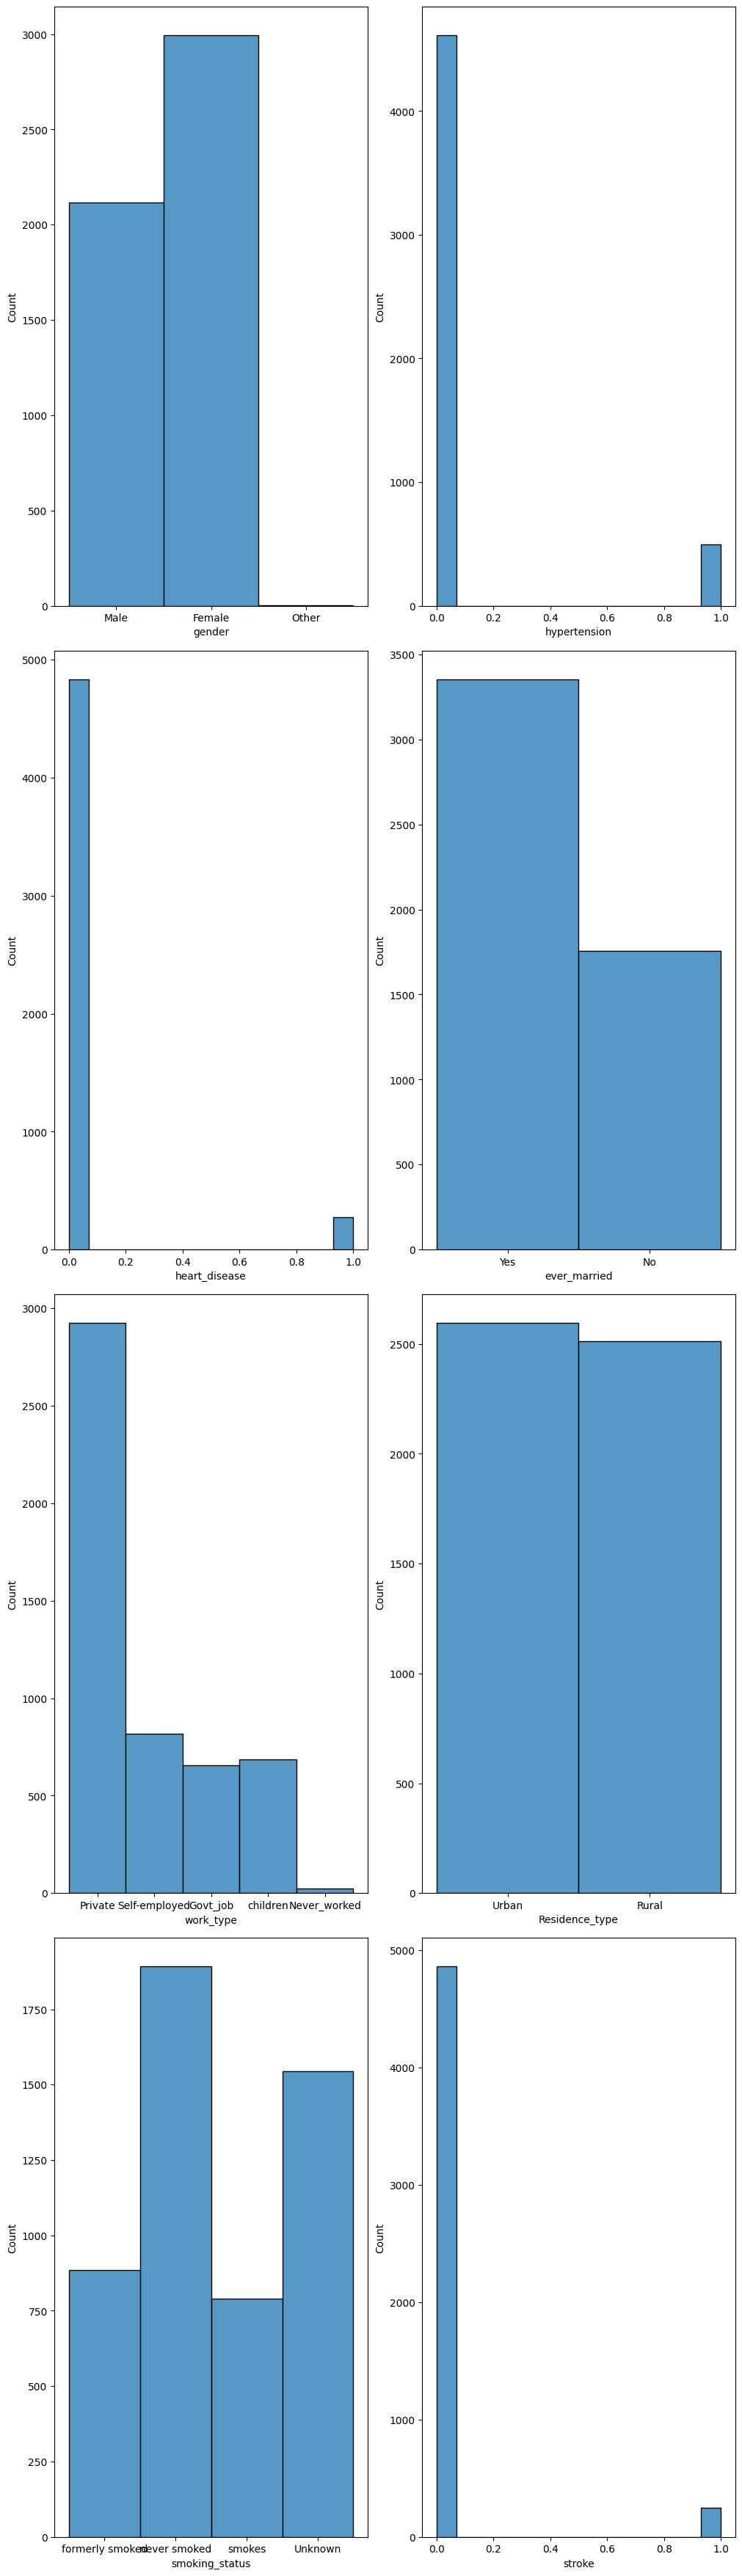

In [ ]:
#plotting distributions
i = 421
fig = plt.figure(figsize=(10,35),layout="constrained")
for col in categorical_columns:
  fig.add_subplot(i)
  sns.histplot(x=col,data=df)
  i += 1

#Preprocessing

Prepare the data in a way to be ready to be used to train a DL model.

In [ ]:
#Test Your Zaka
#I will first copy the df dataframe to a new dataframe for NN.
NN_df = df.copy()
#now let us drop useless features like id.
NN_df.drop('id',axis=1,inplace=True)
#ever_married, Residence_type are binary, I will use label encoder instead of dummy encoding.
le = LabelEncoder()
#defining binary columns.
binary_columns = ['ever_married', 'Residence_type']
#looping over binary columns.
for col in binary_columns:
    NN_df[col] = le.fit_transform(NN_df[col])
#gender has 3 uniques: female, male, and other.
#Other has only 1 instance, which is statistically irrelevant as an input so will drop it.
NN_df.drop(NN_df[NN_df['gender']=='Other'].index, axis=0, inplace=True)
#thus, transforming gender into a binary dataset.
#now, I will apply labelencoding to gender.
NN_df['gender'] = le.fit_transform(NN_df['gender'])
#the work_type is multiclass nominal data, therefore we need to apply one-hot encoding.
col = 'work_type'
NN_df = pd.get_dummies(NN_df, prefix=col, prefix_sep='.', columns=[col])
#the smoking_status has some ordinal data into it.
#we can say that never smoked < formerly smoked < smokes.
#therefore we can, for example, assign labels {never smoke:0, formerly smoked:1, smokes:2}
#however, the data contains a huge number (~1500) of entries that are unknown.
#we can think of doing a mixture between labeled and one-hot encoding in order not to increase the number of columns/features.
#however, for now, I will consider the easy solution of simply doing a one-hot encoding.
col = 'smoking_status'
NN_df = pd.get_dummies(NN_df, prefix=col, prefix_sep='.', columns=[col])
#now, we are left with the problem of the missing values in the bmi column
#I will fill in the missing values with a knn imputer, since the mean might change the distribution.
#defining imputer
imputer = KNNImputer()
#the imputation usually should consider X_train.
#meaning that we should do the train-test split before imputation.
#this is in order to avoid what we call "data leakage" or "contamination".
#however, for this challenge, I will do the imputation on all the dataset.
#the imputation should consider only the input features X and not the output target y.
X_to_fit = NN_df.drop('stroke', axis=1)
col_to_impute = 'bmi'
loc_of_col = X_to_fit.columns.get_loc(col_to_impute)
X_after_imputation = imputer.fit_transform(X_to_fit)
imputed_X_col = X_after_imputation[:,loc_of_col]
NN_df[col_to_impute] = imputed_X_col
#verifying all is ok
NN_df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type.Govt_job,work_type.Never_worked,work_type.Private,work_type.Self-employed,work_type.children,smoking_status.Unknown,smoking_status.formerly smoked,smoking_status.never smoked,smoking_status.smokes
0,1,67.0,0,1,1,1,228.69,36.60,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,32.56,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.50,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.40,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.00,1,0,0,0,1,0,0,0,1,0


In [ ]:
#now we need to normalize or standardize our data.
#I choose to normalize the data, since the data contains categorical features.
#standardizing will lead to float values for categorical features.
#however, I do not think that it matters a lot since the inputs will be multiplied by weights.
#normaly this should be done after the train/test split.
MAX = NN_df.max()
print(MAX)
NN_df = NN_df.divide(MAX)
#the data is now ready to be injected into the neural network.
NN_df.describe()

gender                            1.0
age                               1.0
hypertension                      1.0
heart_disease                     1.0
ever_married                      1.0
Residence_type                    1.0
avg_glucose_level                 1.0
bmi                               1.0
stroke                            1.0
work_type.Govt_job                1.0
work_type.Never_worked            1.0
work_type.Private                 1.0
work_type.Self-employed           1.0
work_type.children                1.0
smoking_status.Unknown            1.0
smoking_status.formerly smoked    1.0
smoking_status.never smoked       1.0
smoking_status.smokes             1.0
dtype: float64


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type.Govt_job,work_type.Never_worked,work_type.Private,work_type.Self-employed,work_type.children,smoking_status.Unknown,smoking_status.formerly smoked,smoking_status.never smoked,smoking_status.smokes
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,0.413975,0.527195,0.097475,0.054022,0.656293,0.508123,0.390595,0.296515,0.048738,0.128597,0.004306,0.572323,0.160305,0.134469,0.302212,0.173028,0.370327,0.154433
std,0.492592,0.275775,0.296633,0.226084,0.474991,0.499983,0.166648,0.079559,0.215340,0.334786,0.065486,0.494790,0.366925,0.341188,0.459261,0.378308,0.482939,0.361399
min,0.000000,0.000976,0.000000,0.000000,0.000000,0.000000,0.202841,0.105533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304878,0.000000,0.000000,0.000000,0.000000,0.284242,0.242828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.548780,0.000000,0.000000,1.000000,1.000000,0.338117,0.288934,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.743902,0.000000,0.000000,1.000000,1.000000,0.419850,0.339139,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Building the DL Model

Now it's time to build the actual model. Propose a DL architecture suitable for this problem and print its summary.

In [ ]:
#Test Your Zaka
#I will build a perceptron with a layer having a number of neurons equal to a multiple of the input.
#I will use a relu activation function for the layer and a sigmoid for the output.
nrows, ncols = NN_df.shape
model = Sequential()
#It is usually recommended to use he initialization for relu and glorot initialization for sigmoid
model.add(Dense(4*(ncols-1), kernel_initializer='he_normal', input_dim=(ncols-1), activation='relu'))
model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
#print summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                1224      
                                                                 
 dense_1 (Dense)             (None, 1)                 69        
                                                                 
Total params: 1,293
Trainable params: 1,293
Non-trainable params: 0
_________________________________________________________________


###Compiling the model

Now we need to compile the model.

In [ ]:
#Test Your Zaka
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

###Fitting the model

we split our dataset between training and testing, and we fit the model on training data (70%), and validate on the testing data (30%).

In [ ]:
#Test Your Zaka
y_col = 'stroke'
#store all columns except stroke one as inputs in X
X_stroke = NN_df.drop(y_col, axis=1).values
#store the stroke column as the target (label) in y
y_stroke = NN_df[y_col].values

#split dataset in a 70/30 split
x_stroke_train, x_stroke_test, y_stroke_train, y_stroke_test = train_test_split(X_stroke, y_stroke, test_size=0.3, random_state=42, stratify = y_stroke)
#I chose to stratify the split to ensure that the train and test distributions are similar to the original distribution.
print(x_stroke_train.shape, y_stroke_train.shape)
print(x_stroke_test.shape, y_stroke_test.shape)

training_history_1 = model.fit(x_stroke_train, y_stroke_train, epochs=150, batch_size=50, verbose=0)
print('\nModel Trained!\n')

scores = model.evaluate(x_stroke_test, y_stroke_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

(3576, 17) (3576,)
(1533, 17) (1533,)

Model Trained!

accuracy: 95.11%


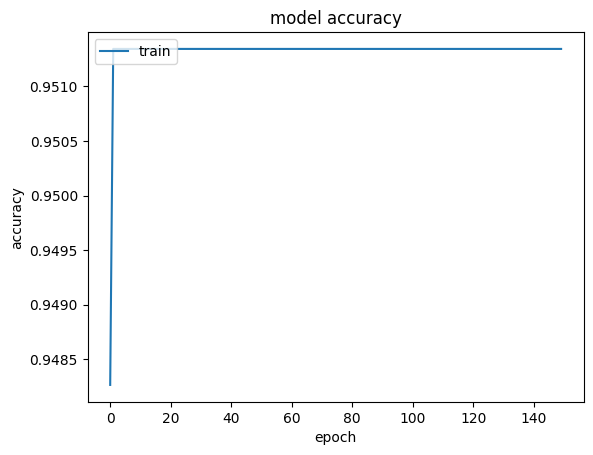

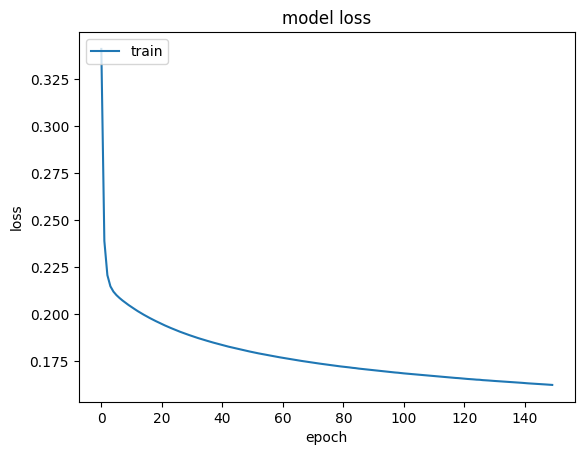

In [ ]:
# summarize history for training and validation accuracy
plt.plot(training_history_1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(training_history_1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy: 95.11%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The presicion of the model is: 0.0%
The recall of the model is: 0.0%
The F1 score of the model is: 0.0%


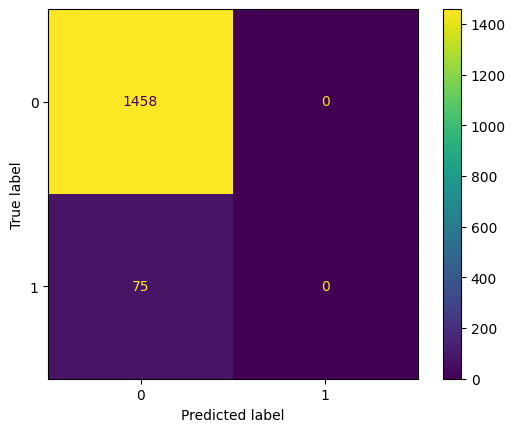

In [ ]:
scores = model.evaluate(x_stroke_test, y_stroke_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

y_pred = np.round(model.predict(x_stroke_test, verbose=0))
cm = confusion_matrix(y_stroke_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

pres, rec, f1s, _ = precision_recall_fscore_support(y_stroke_test, y_pred,average='binary')
print('The presicion of the model is: %.1f%%' %(100*pres))
print('The recall of the model is: %.1f%%' %(100*rec))
print('The F1 score of the model is: %.1f%%' %(100*f1s))

What can you deduce from the results you obtained?

**We have a high accuracy of 95%. However, we have a recall of 1%. This is mainly due to high imbalance in the strokes data. We have a lot more no strokes than strokes data. This is the famous "accuracy trap". The model is only giving 0s.**

**It should be noted that, when the data split between train and test was not stratified the model gave a different behavior for the loss and accuracy.**

#Improving DL Models

**TIP: When tuning your model to obtain a better performance, make sure you use a validation set**

###Data Improvement

After having studied your data in previous parts, enhance the performance of your model with one data improvement using **SMOTE**.

In [ ]:
#Test Your Zaka
#We only realize the sampling on the training data
over = SMOTE(sampling_strategy=1, random_state = 42)
#under = RandomUnderSampler(sampling_strategy=1, random_state = 42)
#smote 0.5 + under 1 did not offer an improvememt.
#we can also use SMOTENC since the data contains categorical values.
#However, this does not affect much on neural networks since the input are multiplied by weights.

#splitting data into train/validation 80/20 before smote.
#The idea is to have a similar distribution for validation and test, which is usually recommended.
x_stroke_train_2, x_stroke_valid, y_stroke_train_2, y_stroke_valid = train_test_split(x_stroke_train, y_stroke_train, test_size=0.2, random_state=42, stratify=y_stroke_train)
#applying smote on training data
x_smote_train, y_smote_train = over.fit_resample(x_stroke_train_2, y_stroke_train_2)
#x_balanced_train, y_balanced_train = under.fit_resample(x_smote_train, y_smote_train)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
training_history_2 = model.fit(x_smote_train, y_smote_train, validation_data=(x_stroke_valid, y_stroke_valid), epochs=1000, batch_size=50, verbose=0, callbacks=[es])
print('\nModel Trained!\n')

Epoch 75: early stopping

Model Trained!



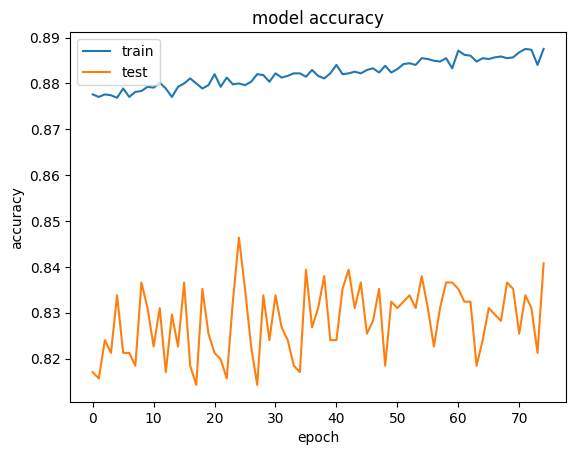

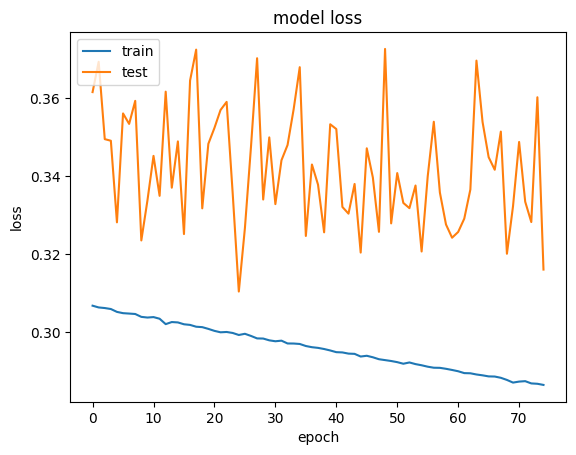

In [ ]:
# summarize history for training and validation accuracy
plt.plot(training_history_2.history['accuracy'])
plt.plot(training_history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(training_history_2.history['loss'])
plt.plot(training_history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy: 83.82%
The presicion of the model is: 15.5%
The recall of the model is: 52.0%
The F1 score of the model is: 23.9%


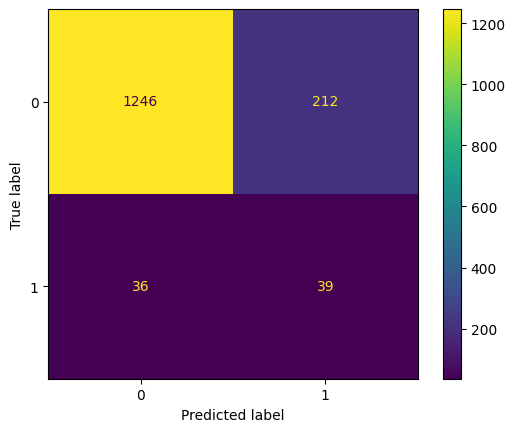

In [ ]:
scores = model.evaluate(x_stroke_test, y_stroke_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

y_pred = np.round(model.predict(x_stroke_test, verbose=0))
cm = confusion_matrix(y_stroke_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

pres, rec, f1s, _ = precision_recall_fscore_support(y_stroke_test, y_pred,average='binary')
print('The presicion of the model is: %.1f%%' %(100*pres))
print('The recall of the model is: %.1f%%' %(100*rec))
print('The F1 score of the model is: %.1f%%' %(100*f1s))

Comment the performance you obtained

**We see that the accuracy has dropped to 75~85%. However, the model is performing better. It is now able to better predict 1s, but the precision is still low. But, we have a major improvement from ~0% to ~20% on the F1 score.We should not that the test set was not smoted in order to keep it "truthful" to the original data. In case, the test data is smoted the F1 score jumps to 80%. However, this is not a good practice since we have data leakage and contamination.**

###Model Design

Propose one model design method to improve the performance of your model even more.

In [ ]:
#Test Your Zaka
#I will build a perceptron with a layer having a number of neurons equal to the input.
nrows, ncols = NN_df.shape
modelX = Sequential()
#I will use batch normalization.
#using batchnormalization after the input layer is actually recommended.
#it is a good alternative to standardizing the data.
#it can also help with issue such as data leakage.
#however, here I will use it after the dense layer.
#I will also add an l2 regularizer.
#l1 gave similar results
modelX.add(Dense(4*(ncols-1), kernel_initializer='he_normal', kernel_regularizer=l2(0.005), input_dim=(ncols-1), use_bias=False))
modelX.add(BatchNormalization())
modelX.add(Activation('relu'))
modelX.add(Dropout(0.3))
modelX.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
#print summary
modelX.summary()
#compiling
modelX.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
#fitting
training_history_X = modelX.fit(x_smote_train, y_smote_train, validation_data=(x_stroke_valid, y_stroke_valid), epochs=1000, batch_size=50, verbose=0, callbacks=[es])
print('\nModel Trained!\n')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 68)                1156      
                                                                 
 batch_normalization_2 (Batc  (None, 68)               272       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 68)                0         
                                                                 
 dropout_2 (Dropout)         (None, 68)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 69        
                                                                 
Total params: 1,497
Trainable params: 1,361
Non-trainable params: 136
__________________________________________________

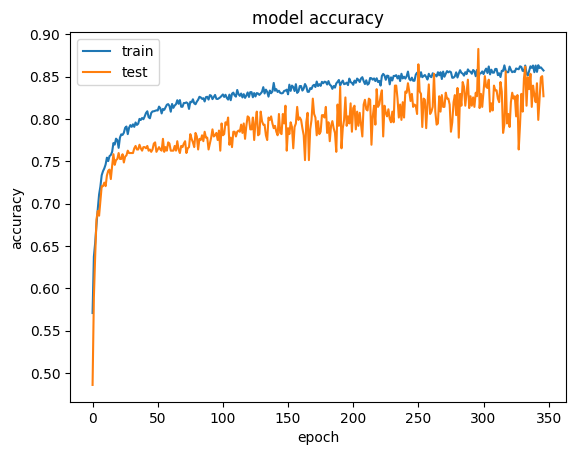

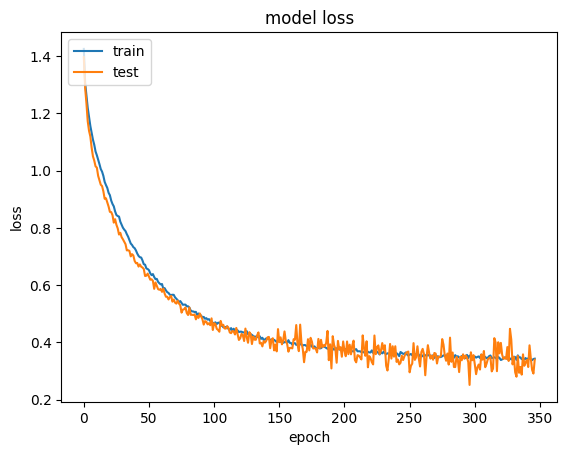

In [ ]:
# summarize history for training and validation accuracy
plt.plot(training_history_X.history['accuracy'])
plt.plot(training_history_X.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(training_history_X.history['loss'])
plt.plot(training_history_X.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy: 79.71%
The presicion of the model is: 13.6%
The recall of the model is: 58.7%
The F1 score of the model is: 22.1%


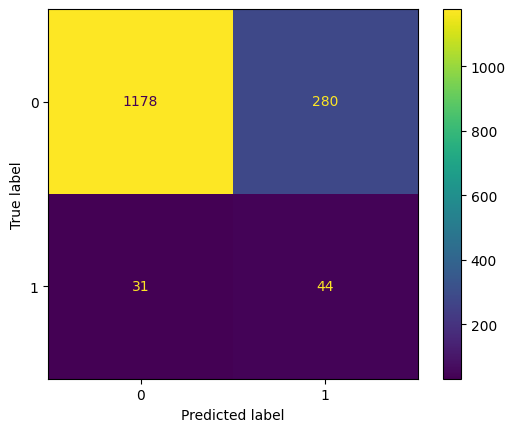

In [ ]:
scores = modelX.evaluate(x_stroke_test, y_stroke_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

y_pred = np.round(modelX.predict(x_stroke_test, verbose=0))
cm = confusion_matrix(y_stroke_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

pres, rec, f1s, _ = precision_recall_fscore_support(y_stroke_test, y_pred,average='binary')
print('The presicion of the model is: %.1f%%' %(100*pres))
print('The recall of the model is: %.1f%%' %(100*rec))
print('The F1 score of the model is: %.1f%%' %(100*f1s))

Comment the performance of your model

**After putting l2 regularizers and dropout layers the model became more stable and increased a bit in the performance. However, it still performs poorly when it comes to the precision. The accuracy and f1 score depend of the initial random state. Sometimes it performs better than the previous model, other times less. However, not something major (+/-2%). The val_accuracy shows a more stable behavior with values approarch the training. We should note that the validation data is not smoted in order to be close to the test**

**It should be note that, ML models from sci-kit learn did not perform any better. There are many references on the internet on that same dataset. (see picture below)**

**I also used deeper models which I found in research papers, which can be checked at the end of the challenge. These models did not offer any major improvements, knowing that they performed really well on their corresponding datasets.**

**It seems to me that the major issue comes from the data itself. This is mainly a data limitation.**

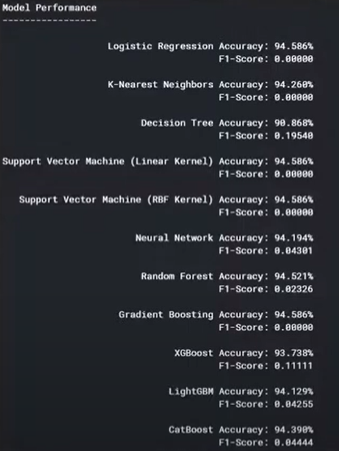

###StratifiedKfolds

In [ ]:
def create_model_SKF():
  #for cross_val_score it is better that the function takes no inputs, otherwise it will generate warning messages.
  model = Sequential()
  model.add(Dense(4*(ncols-1), kernel_initializer='he_normal', kernel_regularizer=l2(0.005), input_dim=(ncols-1), use_bias=False))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))

  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

  return model

In [ ]:
#smoting original training set for SKF
x_smoteSKF_train, y_smoteSKF_train = over.fit_resample(x_stroke_train, y_stroke_train)

In [ ]:
# create model
model_SKF = KerasClassifier(model=create_model_SKF, epochs=100, batch_size=50, verbose=0)
#creating checkpoints
# define the checkpoint's name that includes the index of the epoch and the validation accuracy
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
# create an instance of ModelCheckpoint
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results_SKF = cross_val_score(model_SKF, x_smoteSKF_train, y_smoteSKF_train, cv=kfold, scoring='accuracy', fit_params={'callbacks': callbacks_list})
#Unable to save the model in cross_val_score ask Mrad if it is possible to do it.
#According to Chatgpt, it is not possible to save using StratifiedKFold.
#we must manually create a loop in order to cross validate and save our model.
#please ignore the checkpoint part in the correction.

In [ ]:
print("%.2f (+/- %.2f)" % (results_SKF.mean(), results_SKF.std()))

0.83 (+/- 0.01)


**With cross_val_score, I obtained 83% accuracy and 83% for F1. However, we must keep in mind that in the cross validation process we are using smoted data. When we use the test data (raw not smoted), we get low performances.**

**Note that I am keeping the real data not smoted as it is the best practice.**

###Hyperparameter Tuning

Now we will tune some hyperparameters of our model. Pick two hyperparameters to optimize, and run a grid search to optimize them. Then fit your model on the best parameters.

In [ ]:
#Test Your Zaka
def create_model(n_neurons, activation_function='relu', l2_reg=0.005, dropout_rate=0.2):

  model = Sequential()
  model.add(Dense(n_neurons, kernel_initializer='he_normal', kernel_regularizer=l2(l2_reg), input_dim=(ncols-1), use_bias=False))
  model.add(BatchNormalization())
  model.add(Activation(activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
  #return without compile
  #by putting the optimizer in the keras classifier we can do some tuning on it
  #model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
modelGS = KerasClassifier(model=create_model, optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'], epochs=100, batch_size=50, verbose=0)
#I will do 3.
#Not that we can tune many other things like optimizer, learning rate, activation functions, etc...
#I will focus on the neural network itself
NON = [34, 51, 68, 85] #multiples of the features.
rates = [0.1, 0.2, 0.3]
l2_regs = [0.01, 0.005, 0.001]
param_grid = dict(model__n_neurons=NON, model__dropout_rate=rates, model__l2_reg=l2_regs)
print(param_grid)
#I will do a small trick...
#first, I will concatenate the smoted train and raw test data
x_conc = np.concatenate([x_smote_train,x_stroke_test])
y_conc = np.concatenate([y_smote_train,y_stroke_test])
#now I will define a predefined test split which is our test data so gridsearch will do the validation on the test data.
test_fold = np.concatenate([-np.ones(y_smote_train.shape),np.zeros(y_stroke_test.shape)])
pds = PredefinedSplit(test_fold)
#I am doing this because the model is performing well on the smoted data (i.e. the training set) but poorly on the test set (real representation).
#in this way the gridsearch is finding the optimum parameters with reference to the test set.
grid = GridSearchCV(estimator=modelGS, param_grid=param_grid, scoring = ['accuracy', 'f1'], refit = 'f1', n_jobs=-1, verbose=2, cv=pds)
grid.get_params().keys()
grid_result = grid.fit(x_conc, y_conc)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

{'model__n_neurons': [34, 51, 68, 85], 'model__dropout_rate': [0.1, 0.2, 0.3], 'model__l2_reg': [0.01, 0.005, 0.001]}
Fitting 1 folds for each of 36 candidates, totalling 36 fits
Best: 0.237762 using {'model__dropout_rate': 0.3, 'model__l2_reg': 0.005, 'model__n_neurons': 68}


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
params = grid_result.cv_results_['params']
means = grid_result.cv_results_['mean_test_accuracy']
f1scores = grid_result.cv_results_['mean_test_f1']
for mean, f1score, param in zip(means, f1scores, params):
    print("Acc: %f f1: %f with: %r" % (mean, f1score, param))

Best: 0.237762 using {'model__dropout_rate': 0.3, 'model__l2_reg': 0.005, 'model__n_neurons': 68}
Acc: 0.748858 f1: 0.215886 with: {'model__dropout_rate': 0.1, 'model__l2_reg': 0.01, 'model__n_neurons': 34}
Acc: 0.805610 f1: 0.235897 with: {'model__dropout_rate': 0.1, 'model__l2_reg': 0.01, 'model__n_neurons': 51}
Acc: 0.801044 f1: 0.223919 with: {'model__dropout_rate': 0.1, 'model__l2_reg': 0.01, 'model__n_neurons': 68}
Acc: 0.768428 f1: 0.219780 with: {'model__dropout_rate': 0.1, 'model__l2_reg': 0.01, 'model__n_neurons': 85}
Acc: 0.762557 f1: 0.222222 with: {'model__dropout_rate': 0.1, 'model__l2_reg': 0.005, 'model__n_neurons': 34}
Acc: 0.765819 f1: 0.214442 with: {'model__dropout_rate': 0.1, 'model__l2_reg': 0.005, 'model__n_neurons': 51}
Acc: 0.773646 f1: 0.220225 with: {'model__dropout_rate': 0.1, 'model__l2_reg': 0.005, 'model__n_neurons': 68}
Acc: 0.787997 f1: 0.220624 with: {'model__dropout_rate': 0.1, 'model__l2_reg': 0.005, 'model__n_neurons': 85}
Acc: 0.756686 f1: 0.227743

In [ ]:
#Test Your Zaka
y_pred = grid.predict(x_stroke_test)

accuracy = accuracy_score(y_stroke_test, y_pred)
print('The accuracy of the model is: %.1f%%' %(100*accuracy))

pres, rec, f1s, _ = precision_recall_fscore_support(y_stroke_test, y_pred,average='binary')
print('The presicion of the model is: %.1f%%' %(100*pres))
print('The recall of the model is: %.1f%%' %(100*rec))
print('The F1 score of the model is: %.1f%%' %(100*f1s))

The accuracy of the model is: 82.6%
The presicion of the model is: 16.3%
The recall of the model is: 61.3%
The F1 score of the model is: 25.7%


Comment the performance of your model

**The performance of the model increased by a little. However, once again, this is the limit that can be obtained with this dataset.**

#Extra Models

##Model 1: 3 hidden layers with tanh actication

In [ ]:
#Test Your Zaka
#This model is inspired by the two following papers
#https://doi.org/10.1371/journal.pone.0213007
#https://doi.org/10.1109/embc.2017.8037515
#3 fully connected layers with tanh activation function.
#I slightly modified it by adding a DropOut Layer
#the dropout layer added some stability and made the learning fast
nrows, ncols = NN_df.shape
DOR = 0.2
reg_rate = .01

model2 = Sequential()
model2.add(Dense((ncols-1), kernel_initializer='glorot_normal', kernel_regularizer=l2(reg_rate), input_dim=(ncols-1), activation='tanh'))
model2.add(Dropout(DOR))
model2.add(Dense(ncols-1, kernel_initializer='glorot_normal', kernel_regularizer=l2(reg_rate), activation='tanh'))
model2.add(Dropout(DOR))
model2.add(Dense(ncols-1, kernel_initializer='glorot_normal', kernel_regularizer=l2(reg_rate), activation='tanh'))
model2.add(Dropout(DOR))
model2.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
#print summary
model2.summary()
#compiling
model2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#importing early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)
#fitting
training_history_3 = model2.fit(x_smote_train, y_smote_train, validation_data=(x_stroke_valid, y_stroke_valid), epochs=10000, batch_size=50, verbose=0, callbacks=[es])
print('\nModel Trained!\n')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 17)                306       
                                                                 
 dropout_8 (Dropout)         (None, 17)                0         
                                                                 
 dense_17 (Dense)            (None, 17)                306       
                                                                 
 dropout_9 (Dropout)         (None, 17)                0         
                                                                 
 dense_18 (Dense)            (None, 17)                306       
                                                                 
 dropout_10 (Dropout)        (None, 17)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                

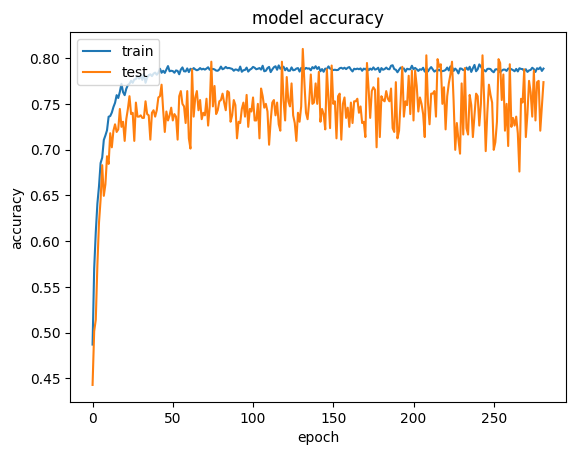

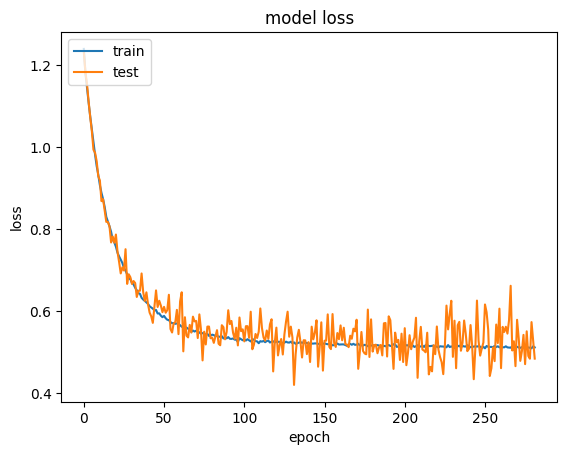

In [ ]:
# summarize history for training and validation accuracy
plt.plot(training_history_3.history['accuracy'])
plt.plot(training_history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(training_history_3.history['loss'])
plt.plot(training_history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy: 75.93%
The presicion of the model is: 15.5%
The recall of the model is: 70.8%
The F1 score of the model is: 25.5%


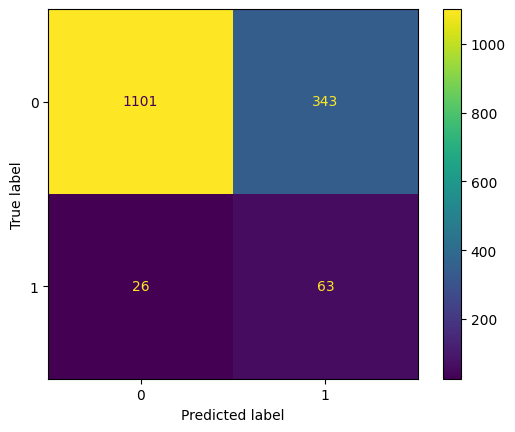

In [ ]:
scores = model2.evaluate(x_stroke_test, y_stroke_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

y_pred = np.round(model2.predict(x_stroke_test, verbose=0))
cm = confusion_matrix(y_stroke_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

pres, rec, f1s, _ = precision_recall_fscore_support(y_stroke_test, y_pred,average='binary')
print('The presicion of the model is: %.1f%%' %(100*pres))
print('The recall of the model is: %.1f%%' %(100*rec))
print('The F1 score of the model is: %.1f%%' %(100*f1s))

##Model 2: 2 hidden layer with tanh activation with dropout & batch normalization

In [ ]:
#This model is a 2 hidden layer
nrows, ncols = NN_df.shape
DOR2 = 0.2
reg_rate2 = 0.01
#used relu but made no big difference
activation_function = 'tanh'
model3 = Sequential()
#1st set of layers
model3.add(Dense(4*(ncols-1), input_dim=ncols-1, kernel_regularizer=l2(reg_rate2), use_bias=False))
model3.add(BatchNormalization())
model3.add(Activation(activation_function))
model3.add(Dropout(DOR2))
#2nd set of layers
model3.add(Dense(2*(ncols-1), kernel_regularizer=l2(reg_rate2), use_bias=False))
model3.add(BatchNormalization())
model3.add(Activation(activation_function))
model3.add(Dropout(DOR2))
#output
model3.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
#print summary
model3.summary()
#compiling
model3.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#importing early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
#fitting
training_history_4 = model3.fit(x_smote_train, y_smote_train, validation_data=(x_stroke_valid, y_stroke_valid), epochs=10000, batch_size=50, verbose=0, callbacks=[es])
print('\nModel Trained!\n')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 68)                1156      
                                                                 
 batch_normalization_13 (Bat  (None, 68)               272       
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 68)                0         
                                                                 
 dropout_19 (Dropout)        (None, 68)                0         
                                                                 
 dense_33 (Dense)            (None, 34)                2312      
                                                                 
 batch_normalization_14 (Bat  (None, 34)               136       
 chNormalization)                                    

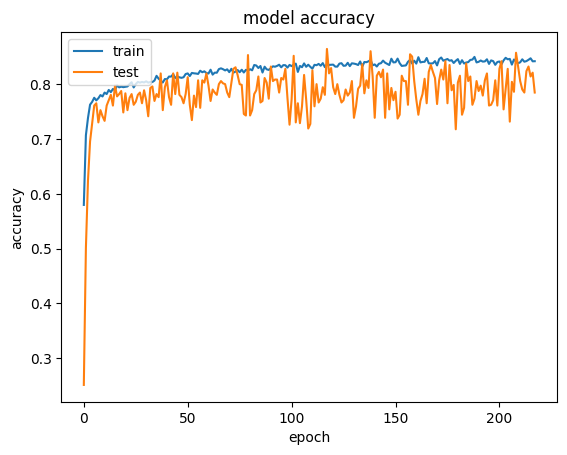

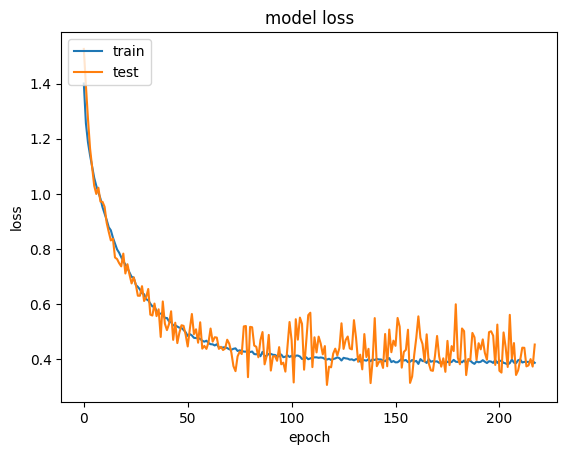

In [ ]:
# summarize history for training and validation accuracy
plt.plot(training_history_4.history['accuracy'])
plt.plot(training_history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(training_history_4.history['loss'])
plt.plot(training_history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy: 79.45%
The presicion of the model is: 15.8%
The recall of the model is: 58.4%
The F1 score of the model is: 24.8%


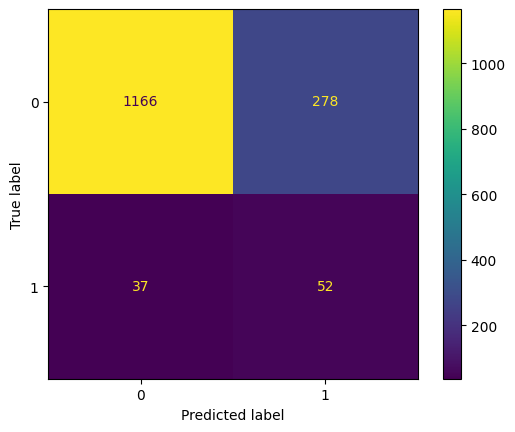

In [ ]:
scores = model3.evaluate(x_stroke_test, y_stroke_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

y_pred = np.round(model3.predict(x_stroke_test, verbose=0))
cm = confusion_matrix(y_stroke_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

pres, rec, f1s, _ = precision_recall_fscore_support(y_stroke_test, y_pred,average='binary')
print('The presicion of the model is: %.1f%%' %(100*pres))
print('The recall of the model is: %.1f%%' %(100*rec))
print('The F1 score of the model is: %.1f%%' %(100*f1s))

#Extra: Real processing case (more or less) with a pipeline

In [ ]:
#this part is the same as before
df_extra = pd.read_csv(filename)

Ex_df = df.copy()

Ex_df.drop('id',axis=1,inplace=True)

le = LabelEncoder()

binary_columns = ['ever_married', 'Residence_type']

for col in binary_columns:
    Ex_df[col] = le.fit_transform(Ex_df[col])

Ex_df.drop(Ex_df[Ex_df['gender']=='Other'].index, axis=0, inplace=True)

Ex_df['gender'] = le.fit_transform(Ex_df['gender'])

col = 'work_type'
Ex_df = pd.get_dummies(Ex_df, prefix=col, prefix_sep='.', columns=[col])

col = 'smoking_status'
Ex_df = pd.get_dummies(Ex_df, prefix=col, prefix_sep='.', columns=[col])
#verifying all is ok
Ex_df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type.Govt_job,work_type.Never_worked,work_type.Private,work_type.Self-employed,work_type.children,smoking_status.Unknown,smoking_status.formerly smoked,smoking_status.never smoked,smoking_status.smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,NaN,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0


In [ ]:
#defining X and y values
y_col = 'stroke'
#store all columns except stroke one as inputs in X
X_stroke_extra = Ex_df.drop(y_col, axis=1).values
#store the stroke column as the target (label) in y
y_stroke_extra = Ex_df[y_col].values
#split dataset in a 70/30 split
#we should do the split before in order to avoid data leakage
x_extra_train, x_extra_test, y_extra_train, y_extra_test = train_test_split(X_stroke_extra, y_stroke_extra, test_size=0.3, random_state=42, stratify=y_stroke)
#it is important to stratify the data to insure that the test & train distribution have the same distribution as the original data.

In [ ]:
#defining the model
def create_baseline():

  nrows, ncols = NN_df.shape
  model = Sequential()
  model.add(Dense(4*(ncols-1), kernel_initializer='he_normal', input_dim=(ncols-1), activation='relu'))
  model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
  #compiling
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
#I will now define a pipeline to transform and estimate the data.
#defining imputer
knni = KNNImputer()
#defining MinMaxScaler
mms = MinMaxScaler()
#the imputation and normalization of our data will be done in a pipeline.
#the evaluation will be on the whole pipeline
mlp = KerasClassifier(model=create_baseline, epochs=150, batch_size=50, verbose=0)

pipe = make_pipeline(knni, mms, mlp)
#the pipe will impute the nans, normalize the data, and fit with the model
pipe.fit(x_extra_train, y_extra_train)
print('\nModel Trained!\n')


Model Trained!



60
The accuracy of the model is: 95.2%
The presicion of the model is: 100.0%
The recall of the model is: 1.3%
The F1 score of the model is: 2.6%


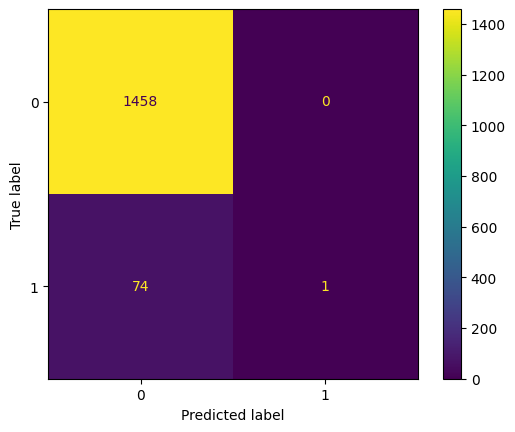

In [ ]:
#same for predict the pipe will impute --> normalize --> predict.
#the training and testing process are split there are no leakage...
#of course it is better to also encode separately but for now I limit the preprocessing to these steps
print(np.sum(np.isnan(x_extra_test))) # we still have 60 nans but the pipe takes care of it all
y_pred = pipe.predict(x_extra_test)
cm = confusion_matrix(y_extra_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
accuracy = accuracy_score(y_stroke_test, y_pred)
print('The accuracy of the model is: %.1f%%' %(100*accuracy))
pres, rec, f1s, _ = precision_recall_fscore_support(y_extra_test, y_pred,average='binary')
print('The presicion of the model is: %.1f%%' %(100*pres))
print('The recall of the model is: %.1f%%' %(100*rec))
print('The F1 score of the model is: %.1f%%' %(100*f1s))